In [1]:
import sys
v_path = '/opt/ros/kinetic/lib/python2.7/dist-packages'
if v_path in sys.path:
    sys.path.remove(v_path)
import numpy as np
import pandas as pd
from PIL import Image  
import os
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')

In [3]:
X = np.load('resized_images.npy')
y = np.load('resized_labels.npy')

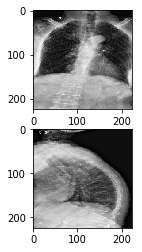

In [28]:
a = X[0,:,:,0].reshape(224, 224, 1)
a1 = np.append(a, a, axis=2)
a1 = np.append(a1, a, axis=2)


a3 = X[0,:,:,1].reshape(224, 224, 1)
a2 = np.append(a3, a3, axis=2)
a2 = np.append(a2, a3, axis=2)

f, axarr = plt.subplots(2)
axarr[0].imshow(a1)
axarr[1].imshow(a2)

In [13]:
a1.shape

(224, 224, 2)

In [30]:
X.shape

(678, 224, 224, 2)

In [101]:
X = X.reshape((X.shape[0], X.shape[1]*X.shape[2]*X.shape[3]))

In [102]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

In [103]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)
df = pd.DataFrame()
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
df['y'] = y
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.12370214 0.11966726 0.08331234]


In [104]:
df.shape

(678, 4)

In [105]:
rndperm = np.random.permutation(df.shape[0])

In [106]:
rndperm

array([ 34, 103, 470, 323, 269, 186, 169, 112, 464, 541, 213, 354, 273,
       188, 383, 125, 390, 123, 555, 638, 161, 140, 325, 393, 669, 389,
       437, 181, 189, 623, 200, 563, 608, 648, 286, 559, 102,  66, 448,
        64, 515, 197,   7, 418, 178, 310, 207, 150, 512, 676, 664,  29,
       489, 618, 422, 203, 459, 505, 557, 287, 463, 429, 265,   8, 290,
       577, 110, 582,  77, 662, 104, 660,  86, 650, 143, 584,  97, 640,
       609, 132, 262,  84,  26, 233, 313, 129, 277, 359, 523, 285, 438,
       177, 283,  89, 571,  20, 195, 280, 677, 624, 305, 446, 431, 320,
       166, 124, 421, 282, 260, 547,  17, 524,  18, 672,  23, 412, 131,
       540, 266, 615, 151, 537, 578, 387, 616, 479, 302, 452,  75, 137,
       134, 306, 115,  70, 138, 472, 261, 550, 146, 656, 355, 565, 487,
       546, 532, 400, 367,  10, 425, 630, 644,   2, 491, 316, 394, 413,
        90, 254, 184, 187,  99, 346, 483, 293, 264, 397, 105, 636,  46,
       340, 591,  33, 312, 404,   3, 236,  21, 642,  38, 179, 56

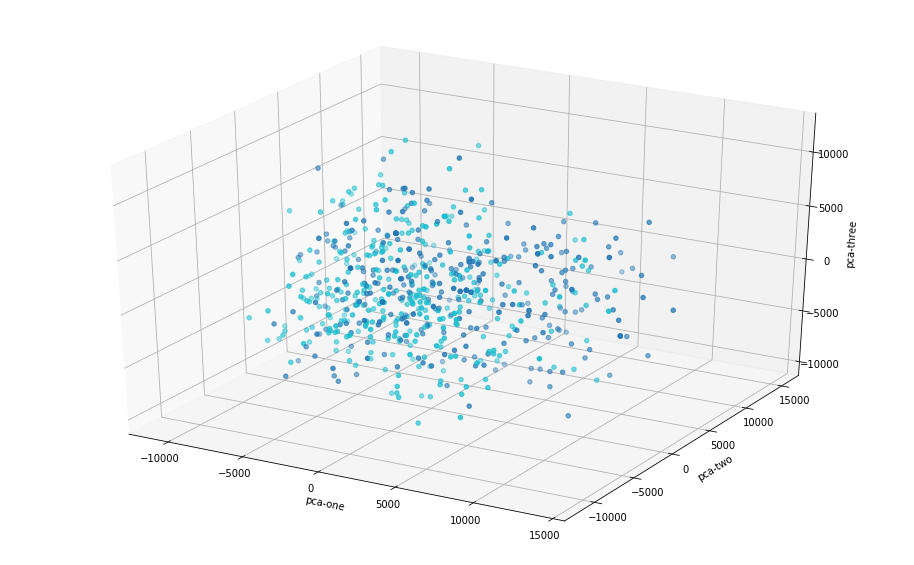

In [107]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

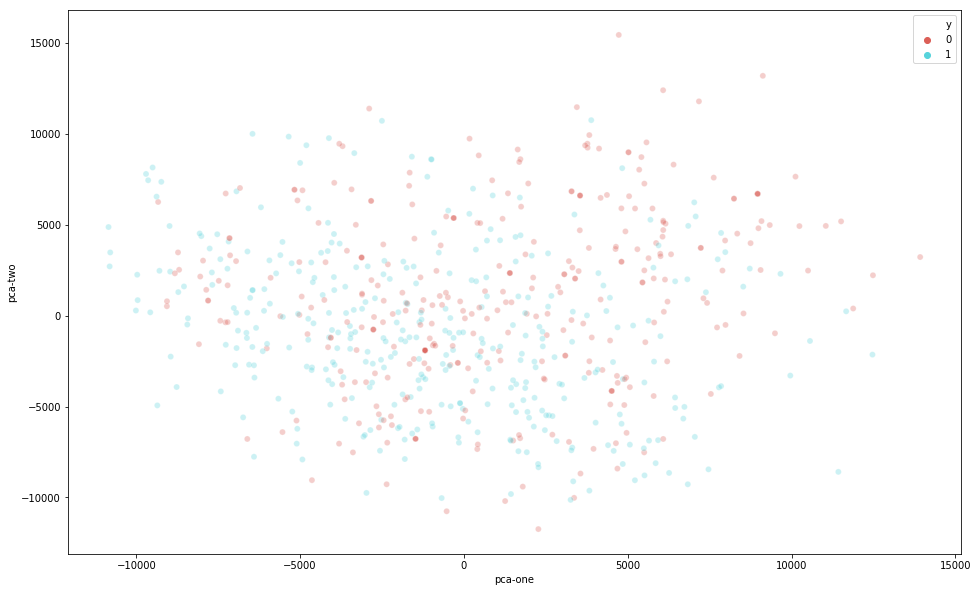

In [108]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

In [109]:
import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 678 samples in 0.000s...
[t-SNE] Computed neighbors for 678 samples in 0.026s...
[t-SNE] Computed conditional probabilities for sample 678 / 678
[t-SNE] Mean sigma: 743.026791
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.955399
[t-SNE] KL divergence after 300 iterations: 0.767617
t-SNE done! Time elapsed: 0.8349709510803223 seconds


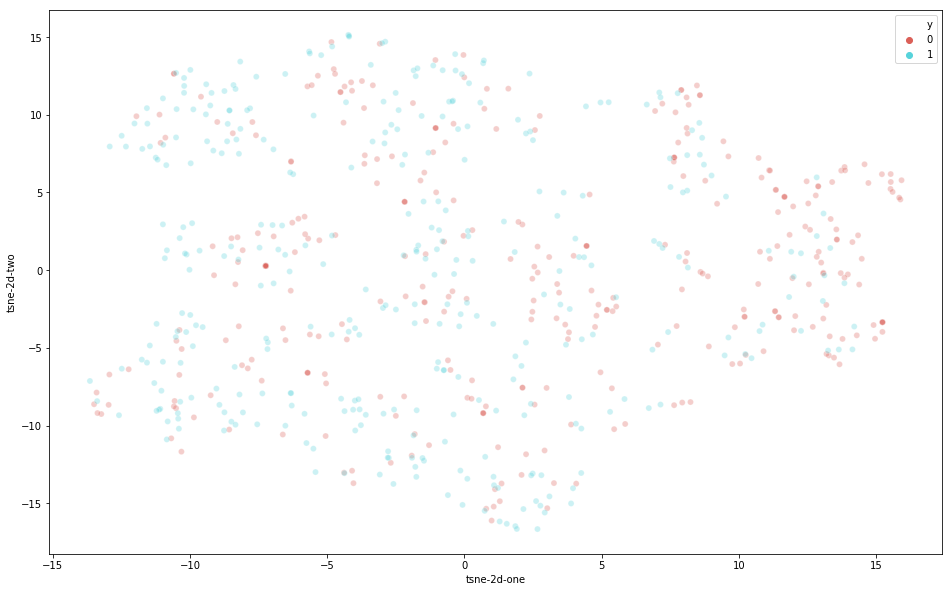

In [114]:
df_tsne = pd.DataFrame()
df_tsne['tsne-2d-one'] = tsne_results[:,0]
df_tsne['tsne-2d-two'] = tsne_results[:,1]
df_tsne['y'] = y
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_tsne,
    legend="full",
    alpha=0.3
)

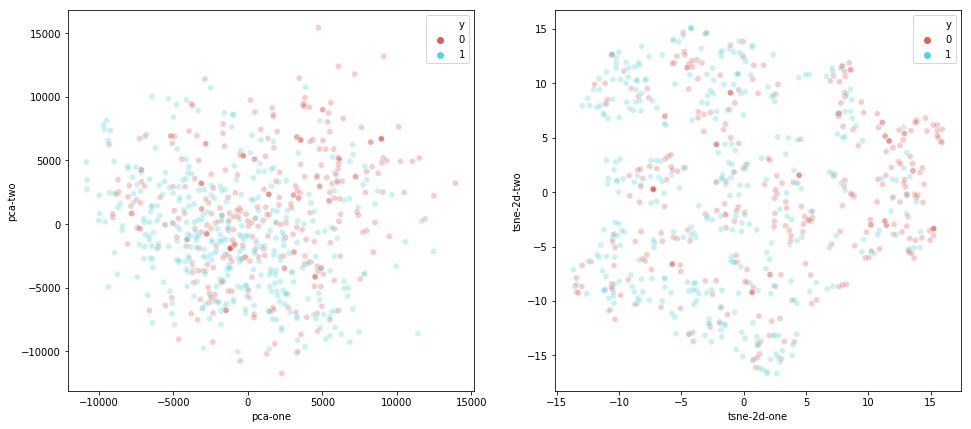

In [116]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_tsne,
    legend="full",
    alpha=0.3,
    ax=ax2
)